# (Homework #1) Bayesian Learning and Naïve Bayes Classifier

## SooJeong Kim

In [13]:
import numpy as np
import pandas as pd
import os
import datetime
from datetime import date
from datetime import datetime
from fbprophet import Prophet
from matplotlib import pyplot as plt
import glob
import pickle
from scipy import io

In [14]:
mat_file1 = io.loadmat('./class1.mat')
mat_file2 = io.loadmat('./class2.mat')


##
<br> 1. (Data visualization) Load the attached data (class1.mat and class2.mat) using Matlab or 
 Python and plot each class in a different color. In this case, the first feature is called length, 
 and the second feature is called weight.<br/>
##

In [15]:
[item.flat[0] for item in mat_file1['R'][0]]

[67.40452054658589, 29.055030890885718]

In [16]:
[item.flat[0] for item in mat_file2['R'][0]]

[83.2587039526277, 26.550746211291486]

In [17]:
data1 = [[row.flat[0] for row in line] for line in mat_file1['R']]

In [18]:
data2 = [[row.flat[0] for row in line] for line in mat_file2['R']]

In [22]:
columns1 = ['length_1','weight_1']
columns2 = ['length_2','weight_2']
df_1 = pd.DataFrame(data1, columns = columns1)
df_2 = pd.DataFrame(data2, columns = columns2)
df = pd.concat([df_1, df_2],axis=1)

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

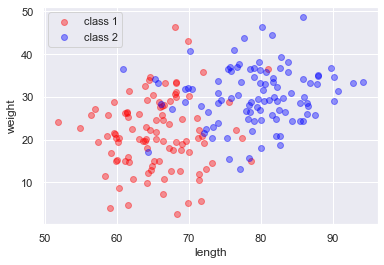

In [24]:
plt.scatter(df['length_1'] , df['weight_1'], alpha=0.4, color='red',label='class 1')
plt.scatter(df['length_2'] , df['weight_2'], alpha=0.4, color='blue',label='class 2')
plt.xlabel("length")
plt.ylabel("weight")
plt.legend()
plt.show()

##
<br> 2. (Data statistic) Calculate the mean and covariance of each class and write them down<br/>
##

In [25]:
mean1 = np.array([np.mean(df['length_1']),np.mean(df['weight_1'])],dtype=np.float32)

In [26]:
mean2 = np.array([np.mean(df['length_2']),np.mean(df['weight_2'])],dtype=np.float32)

#Means for each class

In [27]:
mean1

array([65.55045 , 21.397417], dtype=float32)

In [28]:
mean2

array([79.33298 , 30.232327], dtype=float32)

In [29]:
#covariance 구하는 방법 1
def cov(a, b):

    if len(a) != len(b):
        return

    a_mean = np.mean(a)
    b_mean = np.mean(b)

    sum = 0

    for i in range(0, len(a)):
        sum = ((a - a_mean) * (b - b_mean)).sum()

    return sum/(len(a))

In [30]:
t_df = np.transpose(df)

In [31]:
cov1_ = np.cov(df['length_1'],df['weight_1'])
cov2_ = np.cov(df['length_2'],df['weight_2'])

In [32]:
cov1 = np.cov(t_df.iloc[0],t_df.iloc[1])
cov2 = np.cov(t_df.iloc[2],t_df.iloc[3]) #cov1_과 cov1 값 같음 

#Covariances for each class

In [33]:
cov1

array([[27.02342512,  3.56713765],
       [ 3.56713765, 70.77560176]])

In [34]:
cov2

array([[41.42775115,  5.01652587],
       [ 5.01652587, 44.89646531]])

In [35]:
'''
cov1 = cov(df['length_1'] , df['weight_1'])  
cov2 = cov(df['length_2'] , df['weight_2'])
'''

"\ncov1 = cov(df['length_1'] , df['weight_1'])  \ncov2 = cov(df['length_2'] , df['weight_2'])\n"

In [36]:
#covariance 구하는 방법 2
'''
print("covariance value for class 1: ",np.cov(df['length_1'] , df['weight_1'], bias=True)[0][1])
print("covariance value for class 2: ",np.cov(df['length_2'] , df['weight_2'], bias=True)[0][1])
'''

'\nprint("covariance value for class 1: ",np.cov(df[\'length_1\'] , df[\'weight_1\'], bias=True)[0][1])\nprint("covariance value for class 2: ",np.cov(df[\'length_2\'] , df[\'weight_2\'], bias=True)[0][1])\n'

##
<br> 3. (Make predictions) 


 a) Load the test file (observation. mat) and calculate the likelihood for each class using 
 the mean and covariance calculated in Problem 2<br/>
##

In [40]:
from scipy.stats import multivariate_normal

#likelihood for class 1

In [41]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=mean1, cov=cov1)
var.pdf([1.0,0.0])

3.7003843500621174e-37

#likelihood for class 2

In [42]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=mean2, cov=cov2)
var.pdf([1.0,0.0])

1.98127401244263e-37

##
<br> b) Classify which class each sample of the test file (observation.mat) belongs to and give 
 the explanations.<br/>
##

In [156]:
np_df = df.to_numpy()

In [43]:
obs= io.loadmat('./observation.mat')

In [44]:
[item.flat[0] for item in obs['obs'][0]]
data_obs = [[row.flat[0] for row in line] for line in obs['obs']]
columns_o = ['length_o','weight_o']
df_o = pd.DataFrame(data_obs, columns = columns_o)

In [95]:
import math
from scipy import stats
from scipy.special import factorial
from matplotlib import pyplot as plt

In [189]:
df_ver=df_1
df_verr=df_2

In [191]:
df_ver.columns=['length','weight']
df_verr.columns=['length','weight']

In [193]:
df_ver = pd.concat([df_ver,df_verr],axis=0)

In [199]:
df_ver.columns=['length','weight']

In [216]:
df_ver['class'].iloc[:100]="1"
df_ver['class'].iloc[100:200]="2"

C:\Users\poohl\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [244]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y = df_ver['class'].to_numpy()
gnb.fit(df_ver.loc[:,['length','weight']].to_numpy(), y)

In [219]:
obs['obs']

array([[65, 22],
       [75, 25],
       [80, 31],
       [90, 36],
       [60, 20],
       [70, 30]], dtype=uint8)

In [239]:
y_pred = gnb.predict(obs['obs'])

y_pred

array(['1', '2', '2', '2', '1', '1'], dtype='<U1')

In [253]:
df_o_class = df_o

In [254]:
df_o_class['class']=y_pred

##Table 'df_o_class' shows the classification which class each sample of the test file (observation.mat) belongs to.
I used Gaussian Distribution to classify(predict) classes for each sample in obs test file.

In [243]:
df_o_class

,length_o,weight_o,class
0,65,22,1
1,75,25,2
2,80,31,2
3,90,36,2
4,60,20,1
5,70,30,1


In [91]:
mean1_len

array([65.55045], dtype=float32)

In [45]:
mean1_len = np.array([np.mean(df['length_1'])],dtype=np.float32)
mean2_len = np.array([np.mean(df['length_2'])],dtype=np.float32)
cov1_len = np.cov(df['length_1'])
cov2_len = np.cov(df['length_2'])                  

In [84]:
mean1_len

array([65.55045], dtype=float32)

In [47]:
t_df_o = np.transpose(df_o)

In [49]:
from math import pi
from numpy.linalg import det 

In [50]:
# Example of Gaussian PDF
from math import sqrt
from math import pi
from math import exp
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

 #<br>
 c) Perform the above process only for the first feature (length)<br/>
 #

In [245]:
gnb = GaussianNB()
y = df_ver['class'].to_numpy()
gnb.fit(df_ver.loc[:,['length']].to_numpy(), y)

GaussianNB()

In [246]:
y_pred = gnb.predict(obs['obs'])

y_pred

array(['1', '1', '1', '2', '1', '1'], dtype='<U1')

In [247]:
df_o_class['class_o']=y_pred

In [248]:
df_o_class

,length_o,weight_o,class,class_o
0,65,22,1,1
1,75,25,2,1
2,80,31,2,1
3,90,36,2,2
4,60,20,1,1
5,70,30,1,1


In [51]:
#probability for class 1 - length
calculate_probability(np.mean(df_o['length_o']),mean1_len,cov1_len) 

0.014163088898188462

In [86]:
#probability for class 2 -length
calculate_probability(np.mean(df_o['length_o']),mean2_len,cov2_len) 

0.009529374640829216

When we only consider the first feature(length),<br/>
Class 1 has a bigger probability than Class2.<br/>
Hence Class1 is reasonable according to the Decision Rule.

#<br>
d)Perform the above process only for the second feature (weight)<br/>
#

In [249]:
gnb = GaussianNB()
y = df_ver['class'].to_numpy()
gnb.fit(df_ver.loc[:,['weight']].to_numpy(), y)

GaussianNB()

In [250]:
y_pred = gnb.predict(obs['obs'])

y_pred

array(['1', '1', '1', '1', '1', '1'], dtype='<U1')

In [53]:
mean1_we = np.array([np.mean(df['weight_1'])],dtype=np.float32)
mean2_we = np.array([np.mean(df['weight_2'])],dtype=np.float32)
cov1_we = np.cov(df['weight_1'])
cov2_we = np.cov(df['weight_2'])

In [54]:
#probability for class 1 - weight
calculate_probability(np.mean(df_o['weight_o']),mean1_len,cov1_we) 

0.004872053159148831

In [55]:
#probability for class 2 -weight
calculate_probability(np.mean(df_o['weight_o']),mean2_we,cov2_we) 

0.008867323431075432

When we only consider the second feature(weight),<br/>
Class 2 has a bigger probability than Class1.<br/>
Hence Class2 is reasonable according to the Decision Rule.

 ##<br>
 e) Explain why length or weight is the better feature for classification<br/>
 ##

##
<br>The probability of length with class 1 and 2 are 0.0141 and 0.0095 respectively.
 The probability of weight with class 1 and 2 are 0.0048 and 0.0088 respectively.
 The probability of length is bigger than those of the weight.
 As following the Decision Rule, 'length' is a better feature for classifimcation. <br/>
##

##
<br>  4. (Classification on Iris data) Please implement Naïve Bayes Classification use the Iris data 
(Dataset.csv). In this dataset, there are 4 independent variables (sepal_length, sepal_width, 
 petal_length and petal_width), and 3 dependent variables (setosa, versicolor and the 
 virginica) to be predicted. You will use the various features of the flower (independent 
 variables) to classify the given flower using Naïve Bayes Classifier. You should randomly 
 choose 20% of the dataset as the test set and the remaining 80% as the training set. Please 
 calculate the classification accuracy and confusion matrix on test set, the answer should 
 include codes and some explanations.<br/>
##

In [68]:
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding categorical features from strings to number arrays

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [57]:
dataset = pd.read_csv('Dataset.csv')

In [58]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [72]:
def perf_measure(y_true, y_pred):
    CM = confusion_matrix(y_true, y_pred)

    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]

    return("TP:",TP, "FP:", FP,"TN:", TN, "FN:",FN)

In [73]:
# Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
    
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)
    
    # Print model attributes 
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    print("\nConfusion Matrix for Test Set")
    print(perf_measure(y_test,pred_labels)) 

    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels

In [75]:
# Select data for modeling -------> for length feature 
X=dataset[['sepal_length', 'petal_length']]
y=dataset['species'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  ['setosa' 'versicolor' 'virginica']
Class Priors:  [0.325      0.30833333 0.36666667]
--------------------------------------------------------
Accuracy Score:  0.8666666666666667
--------------------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.85      0.85      0.85        13
   virginica       0.67      0.67      0.67         6

    accuracy                           0.87        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.87      0.87      0.87        30


Confusion Matrix for Test Set
('TP:', 11, 'FP:', 0, 'TN:', 11, 'FN:', 0)


In [76]:
# Select data for modeling -------> for width feature 
X=dataset[['sepal_width', 'petal_width']]
y=dataset['species'].values

# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  ['setosa' 'versicolor' 'virginica']
Class Priors:  [0.325      0.30833333 0.36666667]
--------------------------------------------------------
Accuracy Score:  0.9666666666666667
--------------------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix for Test Set
('TP:', 13, 'FP:', 0, 'TN:', 11, 'FN:', 0)
